# <font color=blue>Results of Workflow analysis</font>




## workflow of workflow analysis


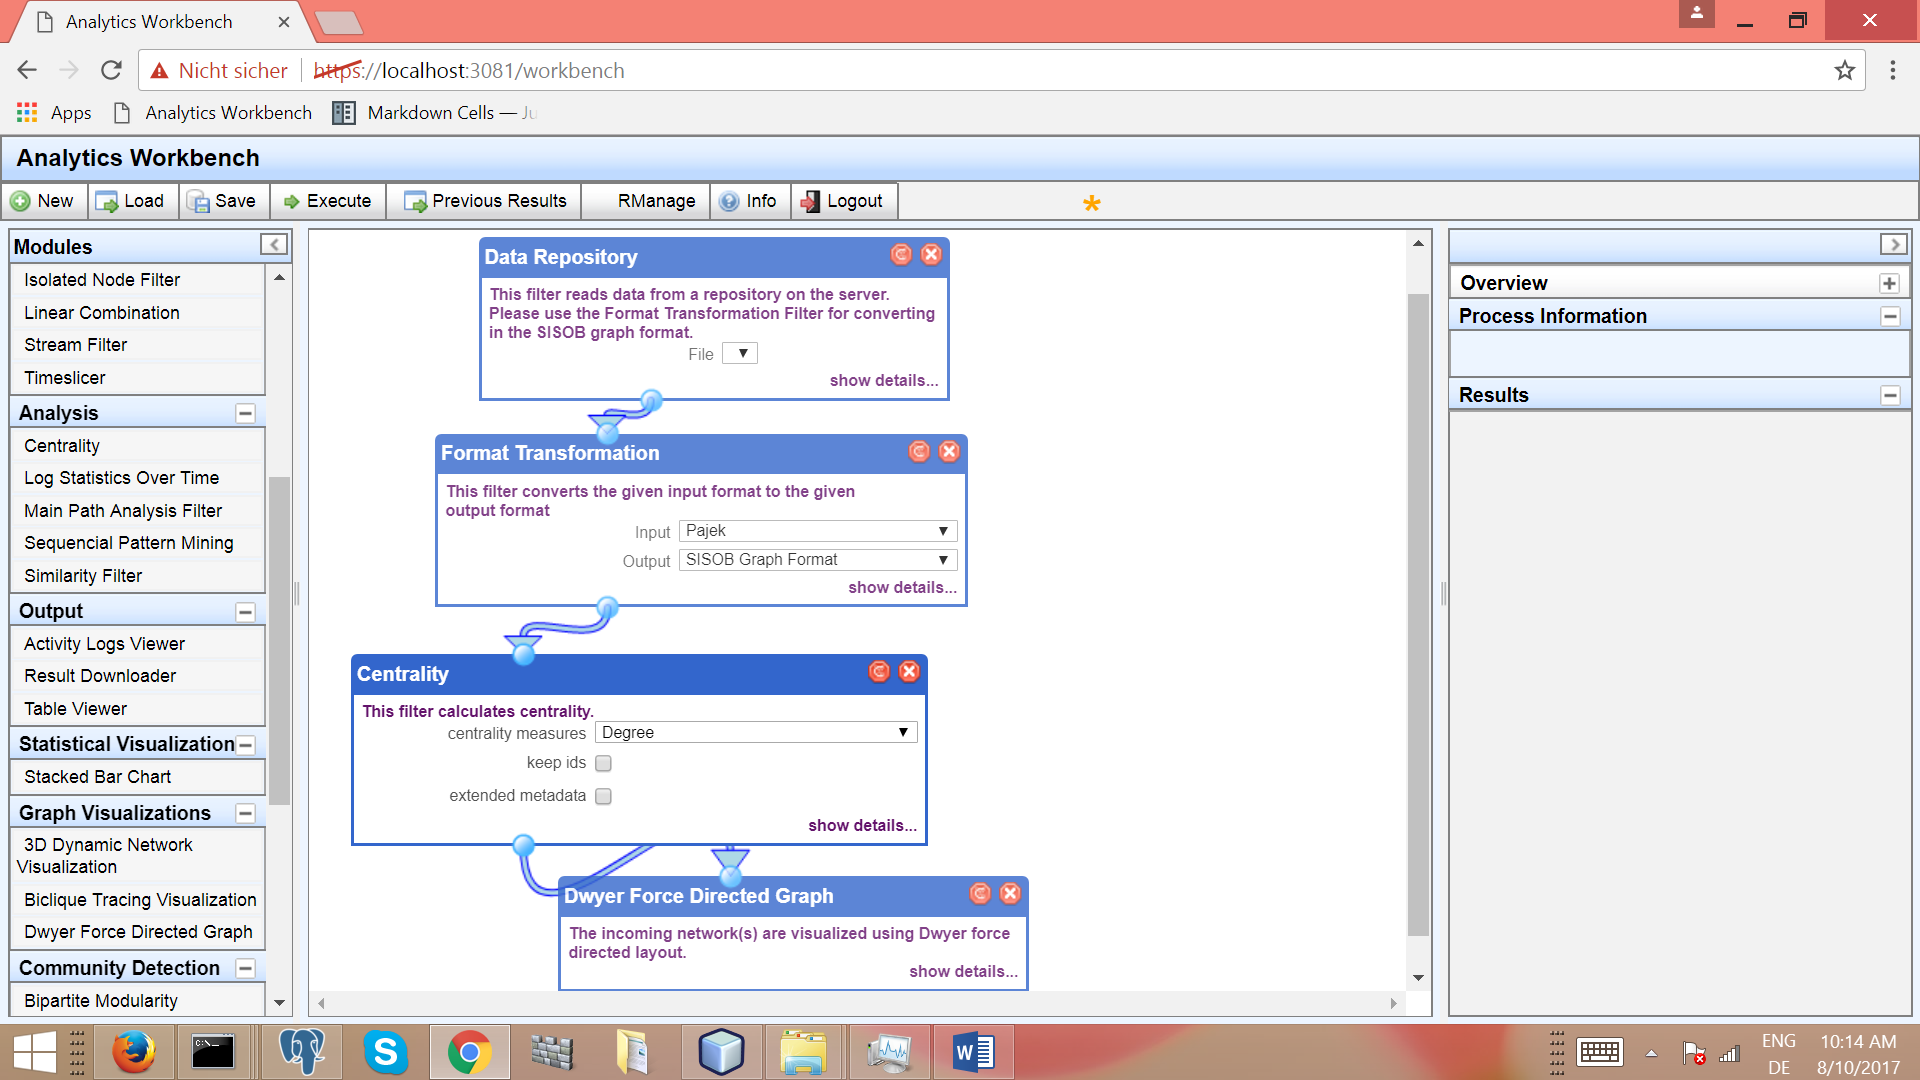

In [11]:
IRdisplay::display_png(file="C:/Users/Mahaganapathy/Desktop/wf.png")

## please enter the URL in Iframe src to display the result of workflow analysis

In [7]:
IRdisplay::display_html('<iframe src="https://localhost:3081/results/f8c6594d-3bf2-488a-b9c4-3912bbd18591/508430Dh/index.html " width=750, height=750></iframe> ')



# <font color=blue>Connection to the database</font>

In [2]:
library("RPostgreSQL")
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = "workbench",
                 host = "localhost", port = 5432,
                 user = "workbench", password ="workbench")
#dbExistsTable(con, "result")
df_postgres <- dbGetQuery(con, "SELECT * from public.result")
#df_postgres

Warning message:
"package 'RPostgreSQL' was built under R version 3.3.3"Loading required package: DBI
Warning message:
"package 'DBI' was built under R version 3.3.3"Warning message in postgresqlExecStatement(conn, statement, ...):
"RS-DBI driver warning: (unrecognized PostgreSQL field type json (id:114) in column 1)"

# <font color=blue>Get data from the database</font>



In [3]:
currentid<- dbGetQuery(con, "SELECT * from public.result where result->>'resultinfo'='https://localhost:3081/results/f8c6594d-3bf2-488a-b9c4-3912bbd18591/508430Dh/index.html'")
currentid

Warning message in postgresqlExecStatement(conn, statement, ...):
"RS-DBI driver warning: (unrecognized PostgreSQL field type json (id:114) in column 1)"

id,result
318,"{""runid"":""f8c6594d-3bf2-488a-b9c4-3912bbd18591"",""instanceid"":""508430Dh"",""resultinfo"":""https://localhost:3081/results/f8c6594d-3bf2-488a-b9c4-3912bbd18591/508430Dh/index.html"",""resultname"":""result_f8c6594d-3bf2-488a-b9c4-3912bbd18591"",""outputformat"":""Dwyer Force Directed Graph"",""resultdescription"":""graph""}"
317,"{""runid"":""f8c6594d-3bf2-488a-b9c4-3912bbd18591"",""instanceid"":""508430Dh"",""resultinfo"":""https://localhost:3081/results/f8c6594d-3bf2-488a-b9c4-3912bbd18591/508430Dh/index.html"",""resultname"":""result_f8c6594d-3bf2-488a-b9c4-3912bbd18591"",""outputformat"":""Dwyer Force Directed Graph"",""resultdescription"":""graph""}"


In [4]:
#Table<-dbGetQuery(con, "SELECT * from public.result where result->>'resultdescription'='table' and result->>'instanceid'='73379Tr'")
#Table




In [5]:
#df_postgres1 <- dbGetQuery(con, "SELECT * from public.coordinationmessage where coordinationjson->>'agentid'='Dwyer Force Directed Graph'")
#df_postgres1

In [6]:
#df_postgres1 <- dbGetQuery(con, "SELECT * from public.coordinationmessage where coordinationjson->>'agentid'='Table Viewer'")

In [7]:
#df_postgres1

## we get graph or table as the output from workbench 

## If output is a graph
### get the path of the json file where the results are stored using the runid

In [8]:
#Graph<-dbGetQuery(con, "SELECT * from public.result where result->>'resultdescription'='graph'")
#Graph

In [14]:
eg<-dbGetQuery(con, "SELECT result ->> 'runid' AS runid,
result ->>'instanceid' as instanceid
FROM result
where result->>'resultinfo'=
'https://localhost:3081/results/f8c6594d-3bf2-488a-b9c4-3912bbd18591/508430Dh/index.html'")
eg


runid,instanceid
f8c6594d-3bf2-488a-b9c4-3912bbd18591,508430Dh
f8c6594d-3bf2-488a-b9c4-3912bbd18591,508430Dh


In [10]:
library(jsonlite)


Warning message:
"package 'jsonlite' was built under R version 3.3.3"

### give the path for example result1 <- fromJSON('C:/NetBeansProjects/0.json')

In [11]:
require(plyr)
library(igraph)

Loading required package: plyr

Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [13]:
#graph <- fromJSON("C:/NetBeansProjects/workbench/trunk/webworkbench/results/f8c6594d-3bf2-488a-b9c4-3912bbd18591/508430Dh/0.json")
#graph
graph <- fromJSON(file.choose())

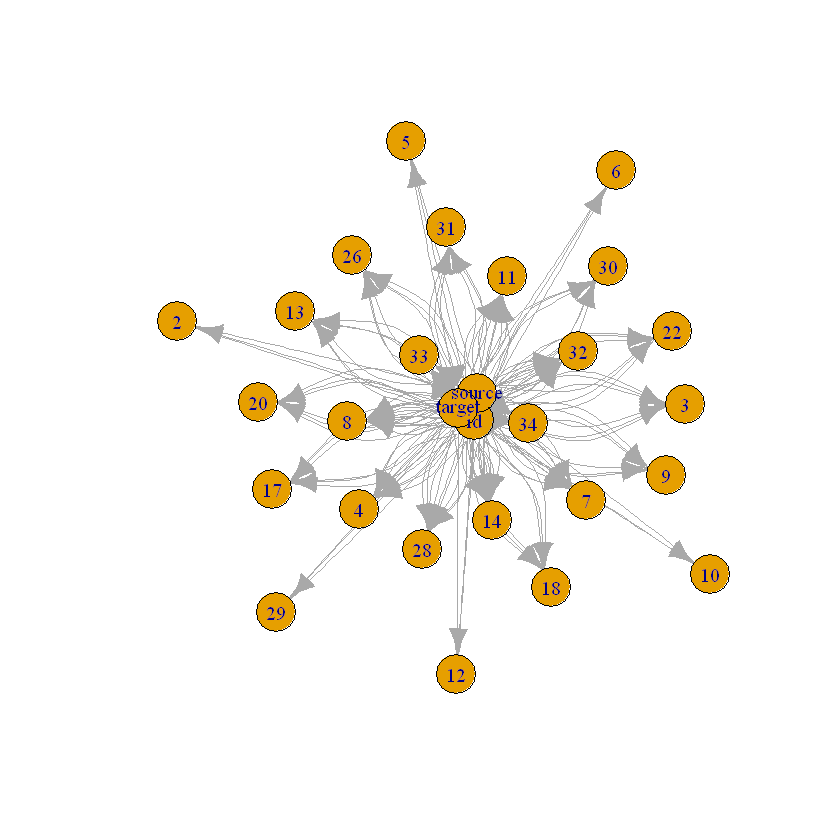

IGRAPH DN-- 28 234 -- 
+ attr: name (v/c), target (e/c)
+ edges (vertex names):
 [1] id->2  id->3  id->3  id->4  id->4  id->4  id->5  id->6  id->7  id->7 
[11] id->7  id->8  id->8  id->8  id->8  id->9  id->9  id->10 id->11 id->11
[21] id->11 id->12 id->13 id->13 id->14 id->14 id->14 id->14 id->17 id->17
[31] id->18 id->18 id->20 id->20 id->22 id->22 id->26 id->26 id->28 id->28
[41] id->28 id->29 id->30 id->30 id->31 id->31 id->32 id->32 id->32 id->32
[51] id->33 id->33 id->33 id->33 id->33 id->33 id->33 id->33 id->33 id->33
[61] id->33 id->34 id->34 id->34 id->34 id->34 id->34 id->34 id->34 id->34
[71] id->34 id->34 id->34 id->34 id->34 id->34 id->34 id->34
+ ... omitted several edges

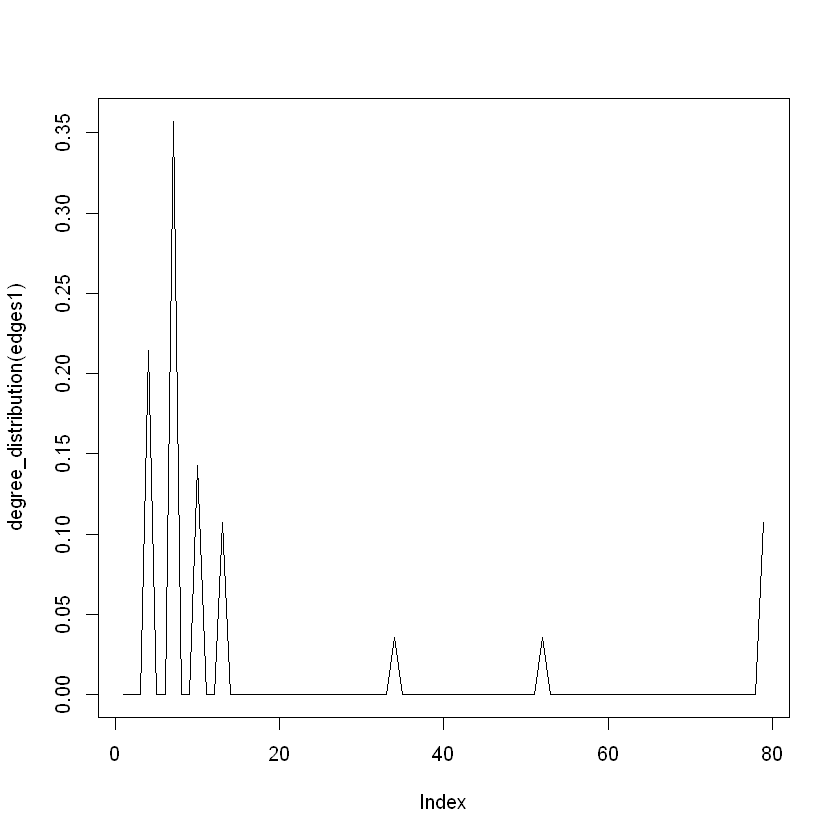

In [15]:
node<-graph$data$nodes
edge<-graph$data$edges

nodes <- ldply(graph$data$nodes, as.data.frame)
edges <- ldply(graph$data$edges, function(edge) {
  data.frame(source=graph$data$edges$source, target=graph$data$edges$target)
  })
edges1<- graph_from_data_frame(edges)
plot(edges1)
plot(degree_distribution(edges1), type="l")
edges1

## If output is a Table

In [16]:
library(jsonlite)


In [17]:
demo <- readLines("C:/NetBeansProjects/workbench/trunk/webworkbench/results/c9ab356c-7a4e-40cb-b4c1-dd5a77e61fa8/73379Tr/samplecsvfile_stf_table.js")
#demo<-readLines(file.choose())

In [18]:
json<-demo[2]
a<- fromJSON(json)
getdata<-a$filedata
table<-fromJSON(getdata)
table


parsingtype,property
double,1
string,"Eldon Base for stackable storage shelf, platinum"
string,Muhammed MacIntyre
double,3
double,-213.25
double,38.94
double,35
string,Nunavut
string,Storage & Organization
double,0.8


In [19]:
eg<-table$data
eg


1,35,Nunavut,"Eldon Base for stackable storage shelf, platinum",3,0.8,id,label,38.94,Muhammed MacIntyre,Storage & Organization,-213.25
2,68.02,Nunavut,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",293,0.58,1,Label 1,208.16,Barry French,Appliances,457.81
3,2.99,Nunavut,"Cardinal Slant-Dï¿½ Ring Binder, Heavy Gauge Vinyl",293,0.39,2,Label 2,8.69,Barry French,Binders and Binder Accessories,46.71
4,3.99,Nunavut,R380,483,0.58,3,Label 3,195.99,Clay Rozendal,Telephones and Communication,1198.97
5,5.94,Nunavut,Holmes HEPA Air Purifier,515,0.5,4,Label 4,21.78,Carlos Soltero,Appliances,30.94
6,4.95,Nunavut,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,515,0.37,5,Label 5,6.64,Carlos Soltero,Office Furnishings,4.43
7,7.72,Nunavut,"Angle-D Binders with Locking Rings, Label Holders",613,0.38,6,Label 6,7.3,Carl Jackson,Binders and Binder Accessories,-54.04
8,6.22,Nunavut,"SAFCO Mobile Desk Side File, Wire Frame",613,,7,Label 7,42.76,Carl Jackson,Storage & Organization,127.70
9,35,Nunavut,"SAFCO Commercial Wire Shelving, Black",643,,8,Label 8,138.14,Monica Federle,Storage & Organization,-695.26
10,8.33,Nunavut,Xerox 198,678,0.38,9,Label 9,4.98,Dorothy Badders,Paper,-226.36


In [20]:
#rawHTML <- paste(readLines("C:/NetBeansProjects/workbench/trunk/webworkbench/results/42ca77e0-2ed6-4988-bd17-6793f94c1fce/73379Tr/samplecsvfile_stf_table.html"), collapse="\n")
#rawHTML
#parse.html <- htmlTreeParse("C:/NetBeansProjects/workbench/trunk/webworkbench/results/42ca77e0-2ed6-4988-bd17-6793f94c1fce/73379Tr/samplecsvfile_stf_table.html", useInternalNodes=TRUE)
#parse.html
#g <- make_ring(10)
#degree(g)
#g2 <- sample_gnp(1000, 10/1000)
#degree_distribution(g2)